In [ ]:
#####################################################################
# Date: April 9, 2021
# Author: Steven Shechter
# Email: steven.shechter@sauder.ubc.ca
# Description:
# Newsvendor Simulation Example
# This is intended to be a simple intro (e.g., a "first model") 
# to Monte Carlo simulation in Python.  
#####################################################################


In [1]:
import numpy as np  # for random number generation
import scipy.stats as stats  # for calculating confidence intervals
import math as math
import matplotlib.pyplot as plt

### Model parameters

In [2]:
purchase_cost=0.25
sale_price=1
unif_ll = 100  # for demand lower limit
unif_ul = 200 # for demand upper limit
num_replications = 1000

### Decision to evaluate (one order quantity; below we evaluate several values in a loop)

In [3]:
order_quantity = 175 # order quanity to test

### Simulation setup

In [4]:
np.random.seed(1) # Set random seed for replicability/debugging purposes 

#initialize
profit = 0
sales_quantity = 0 
expected_profit = 0
profit_list = []
expected_profit_list = []
lower_95_CI_list = []
upper_95_CI_list = []
order_quantity_list = []
percentile_5_list = []
percentile_95_list = []

### Run simulations

In [5]:
#perform simulation replications
for i in range(num_replications):    
    demand = round(np.random.uniform(unif_ll,unif_ul))    # generates continuous Uniform random variable, then rounds to integer
    sales_quantity = min(demand,order_quantity) 
    profit = sale_price * sales_quantity - purchase_cost * order_quantity
    profit_list.append(profit) # store value

### Get the average profit from the simulation replications, along with 95% confidence interval bounds

In [6]:
avg_profit = round(np.average(profit_list),2)
# Get 95% Confidence interval bounds
# first get sample standard deviation of the data in profit_list. 
stddev = np.std(profit_list, ddof=1) 
standard_error = stddev/math.sqrt(num_replications)
t_critical = stats.t.ppf(q = .975, df = num_replications-1)
lower_95_CI = avg_profit - t_critical*standard_error
upper_95_CI = avg_profit + t_critical*standard_error
# print out the outputs
print("average profit = ", avg_profit)
print("95%% CI = (%.2f %.2f)" % (lower_95_CI, upper_95_CI))

average profit =  103.24
95% CI = (101.70 104.78)


### Now try several values of decision variables, and store the results

In [67]:
lower_search_limit = 100
upper_search_limit = 200

# Set up random seed to fix the simulation result
np.random.seed(2)

# outer loop to evalute each possible decision
for order_quantity in range(lower_search_limit,upper_search_limit,1):    
    
    # reset the variables and lists when trying different values for decision variable
    profit_list = []
    
    # inner loop to use simulation to evaluate this particular decision
    for i in range(num_replications):                 
        demand = round(np.random.uniform(unif_ll,unif_ul))
        sales_quantity = min(demand,order_quantity) 
        profit = sale_price * sales_quantity - purchase_cost * order_quantity
        profit_list.append(profit)
    #end inner for loop over num_replications to evaluate this order_quantity
    
    #record metrics of interest to the array that stores these for each order quantity evaluated
    order_quantity_list.append(order_quantity)
    expected_profit = np.average(profit_list)
    expected_profit_list.append(expected_profit)
    percentile_5 = np.percentile(profit_list, 5)
    percentile_95 = np.percentile(profit_list, 95)
    percentile_5_list.append(percentile_5)
    percentile_95_list.append(percentile_95)
    
    # Get 95% Confidence interval bounds
    # first get sample standard deviation of the data in profit_list
    stddev = np.std(profit_list, ddof=1) 
    standard_error = stddev/math.sqrt(num_replications)
    t_critical = stats.t.ppf(q = .975, df = num_replications-1)
    lower_95_CI_list.append(expected_profit - t_critical*standard_error)
    upper_95_CI_list.append(expected_profit + t_critical*standard_error)
    
#end outer for loop that evaluates several values of order_quantity   

### Find the order quantity that maximizes expected profit

In [53]:
index = expected_profit_list.index(max(expected_profit_list))

In [54]:
print("The average profit maximizing order quantity is: %d" % (order_quantity_list[index])) # optimal order quantity

The average profit maximizing order quantity is: 180


In [55]:
print("The maximimum average profit from this order quantity is: %.2f" % (expected_profit_list[index])) # avg profit associated with optimal order quantity

The maximimum average profit from this order quantity is: 104.41


### Plots

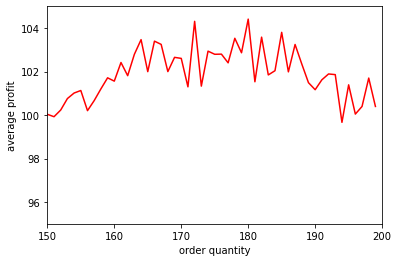

In [70]:
# average profit vs. order quantity
plt.clf() # clears plot
plt.plot(order_quantity_list, expected_profit_list, 'r')
plt.axis([150,200, 95,105]) # note partial plot, from 150 to 200
plt.xlabel("order quantity")
plt.ylabel("average profit")
plt.show()

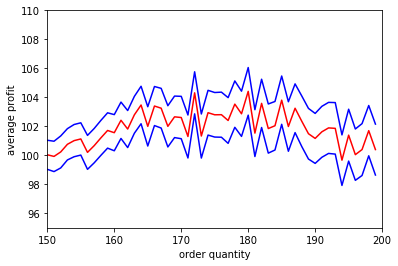

In [71]:
# average , 5th, and 95th percentiles of profit vs. order quantity
plt.clf()
plt.plot(order_quantity_list, expected_profit_list, 'r')
plt.plot(order_quantity_list,lower_95_CI_list, 'b')
plt.plot(order_quantity_list, upper_95_CI_list, 'b')
plt.axis([150, 200, 95, 110]) 
plt.xlabel("order quantity")
plt.ylabel("average profit")
plt.show()